# Levels of gray histogram

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## I.Algorithm

Write an algorithm to compute the histogram of an image with 256 layers of gray between 0 (black) and 255 (white)

In [2]:
def compute_hist(img):
    """
    Computes the histogram of an image, i.e. counts the number of           occurences of each values
    ----------
    Input
    img : numpy array
    ----------
    Output
    out : numpy array
    ----------
    """
    out = np.zeros(256) # Specified length
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            out[int(img[i][j])] += 1
    return out

## II.Computation

**1.** Write a program that computes and visualizes the histogram of a white square (255) of size 50x50 on a black background (0) of size 100x100.

* What do you notice ?

(Try to plot it using 3 different functions : plot(x,y), stem(), bar())

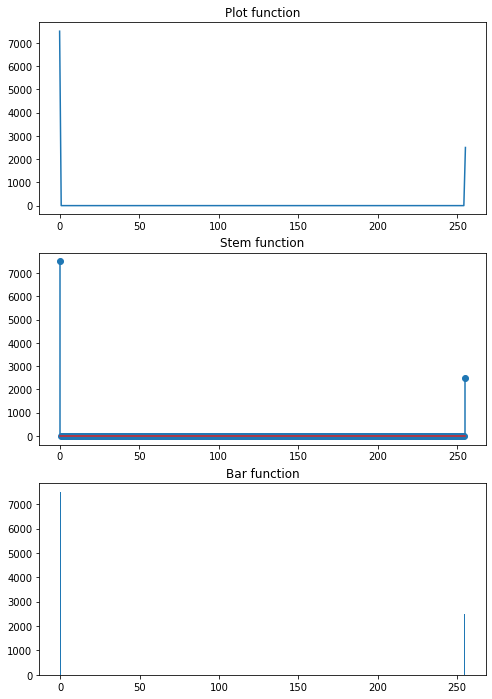

In [3]:
# Same initialization as in project 1
img = np.zeros((100,100))
img[25:75,25:75] = 255
# Histogram
hist = compute_hist(img)
# Display
fig, axs = plt.subplots(3, figsize=(8, 12))
axs[0].set_title("Plot function")
axs[0].plot(np.array([i for i in range(256)]), hist)
axs[1].set_title("Stem function")
axs[1].stem(np.array([i for i in range(256)]), hist)
axs[2].set_title("Bar function")
axs[2].bar(np.array([i for i in range(256)]), hist)
plt.show()

**Answer**

The histogram is as expected, with a majority of black pixels and some white ones and nothing else.
The standard plot seems to be the most convenient for now.

**2.** Write a program that reads an image from the file 'pouttif.jpg' and computes its histogram.

* What do you notice ?
* What could be done to upgrade this image's quality ?

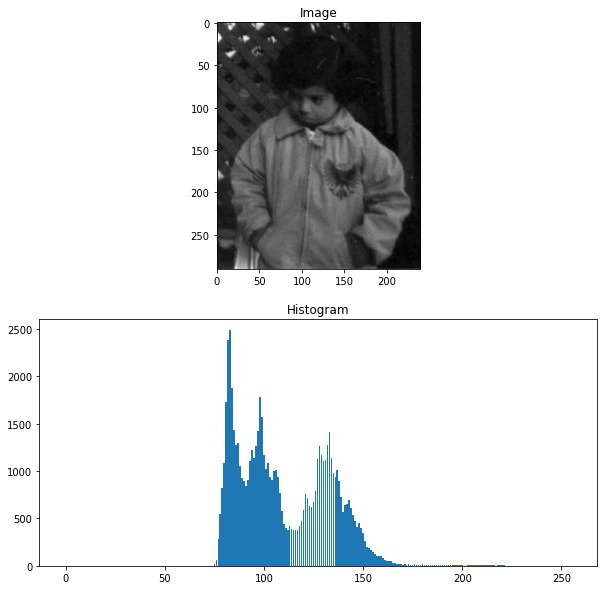

In [6]:
# Load the image
img = cv2.imread("./data/pouttif.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Histogram
hist = compute_hist(img)
# Display
fig, axs = plt.subplots(2, figsize=(10,10))
axs[0].set_title("Image")
axs[0].imshow(img, cmap=plt.cm.gray)
axs[1].set_title("Histogram")
axs[1].bar(np.array([i for i in range(256)]), hist)
plt.show()

**Answer**

* This histogram is very squeezed into a certain range of values, therefore the image is not very balanced.

* To upgrade it, a stretch technique and an uniformization should be applied.

*Formulas :*

* Stretch : $\frac{I_{i, j}-I_{min}}{I_{max}-I_{min}} \times 255$
* Uniformization : $f(x) = \frac{255}{N_{pixels}} \times \sum^{x}_{n=0} H(n)$